In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import random
import seaborn

from datetime import datetime
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/Rain_Australia.csv')

In [3]:
df.shape

(142193, 24)

In [4]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [5]:
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [6]:
df = pd.concat([df[df['RainTomorrow'] == 'No'].sample(31879), df[df['RainTomorrow'] == 'Yes']])

In [7]:
df.shape

(63756, 24)

In [8]:
df.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
26993,2010-04-03,Richmond,13.9,24.5,0.0,NaN,NaN,SE,44.0,ENE,...,55.0,1022.1,1019.3,NaN,NaN,17.7,23.6,No,0.2,No
138998,2017-03-02,Darwin,26.0,34.6,0.0,6.6,9.8,ESE,28.0,SSW,...,49.0,1007.6,1004.7,3.0,7.0,30.1,33.7,No,0.0,No
26454,2017-03-25,Penrith,18.0,24.5,0.0,NaN,NaN,NNE,20.0,NE,...,69.0,NaN,NaN,NaN,NaN,20.6,24.4,No,0.0,No


In [9]:
df['Date'] = df['Date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

df['Year'] = df['Date'].apply(lambda x: x.year)
df['Month'] = df['Date'].apply(lambda x: x.month)
df['Day'] = df['Date'].apply(lambda x: x.day)

In [10]:
df = df.drop(columns = ['Date', 'Location', 'RISK_MM'])

In [11]:
columns_list = df.columns[df.isna().any()].tolist()
for i in columns_list:
    print(i, df[i].isna().values.sum())

MinTemp 310
MaxTemp 131
Rainfall 875
Evaporation 27481
Sunshine 30183
WindGustDir 4449
WindGustSpeed 4416
WindDir9am 4257
WindDir3pm 1841
WindSpeed9am 645
WindSpeed3pm 1258
Humidity9am 902
Humidity3pm 1728
Pressure9am 6224
Pressure3pm 6216
Cloud9am 23450
Cloud3pm 24636
Temp9am 479
Temp3pm 1324
RainToday 875


In [12]:
df = df.drop(columns = ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'])

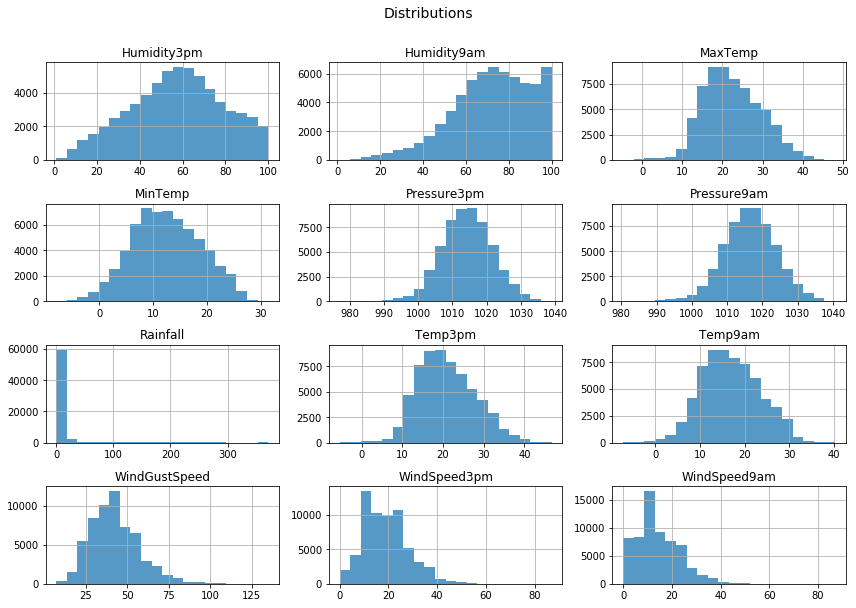

In [13]:
ax = df[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am','WindSpeed3pm', 'Humidity9am', 
         'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']].\
         hist(figsize=(12,8), bins=20, alpha=0.75);
ax = ax.ravel()
plt.tight_layout()

plt.suptitle('Distributions', fontsize=14, y=1.05);
plt.show()

In [14]:
df['WindSpeed3pm'].median()

19.0

In [15]:
df['Humidity3pm'] = df['Humidity3pm'].fillna(value = df['Humidity3pm'].mean())
df['Humidity9am'] = df['Humidity9am'].fillna(value = df['Humidity9am'].mean())
df['MaxTemp'] = df['MaxTemp'].fillna(value = df['MaxTemp'].mean())

df['MinTemp'] = df['MinTemp'].fillna(value = df['MinTemp'].mean())
df['Pressure3pm'] = df['Pressure3pm'].fillna(value = df['Pressure3pm'].mean())
df['Pressure9am'] = df['Pressure9am'].fillna(value = df['Pressure9am'].mean())

df['Rainfall'] = df['Rainfall'].fillna(value = df['Rainfall'].median())
df['Temp3pm'] = df['Temp3pm'].fillna(value = df['Temp3pm'].mean())
df['Temp9am'] = df['Temp9am'].fillna(value = df['Temp9am'].mean())

df['WindGustSpeed'] = df['WindGustSpeed'].fillna(value = df['WindGustSpeed'].median())
df['WindSpeed3pm'] = df['WindSpeed3pm'].fillna(value = df['WindSpeed3pm'].mean())
df['WindSpeed9am'] = df['WindSpeed9am'].fillna(value = df['WindSpeed9am'].median())

df['WindGustDir']= df['WindGustDir'].fillna(df['WindGustDir'].value_counts().idxmax())
df['WindDir9am']= df['WindDir9am'].fillna(df['WindDir9am'].value_counts().idxmax())
df['WindDir3pm']= df['WindDir3pm'].fillna(df['WindDir3pm'].value_counts().idxmax())
df['RainToday']= df['RainToday'].fillna(df['RainToday'].value_counts().idxmax())

In [16]:
df.isna().values.any()

False

In [17]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Year', 'Month', 'Day'],
      dtype='object')

In [18]:
X = df[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
        'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day', 
        'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']]
y = df['RainTomorrow']

y = y.replace(to_replace = ['No', 'Yes'], value = [0, 1])

In [19]:
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

In [20]:
X = pd.get_dummies(X, prefix=['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], 
                   columns=['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=72)

In [22]:
# standardize the numerical features
standardize = StandardScaler()
standardize.fit(X_train.iloc[:, :15], y_train)

# standardize.transform(...)
X_train.loc[:, :15] = standardize.transform(X_train.iloc[:, :15])
X_test.loc[:, :15] = standardize.transform(X_test.iloc[:, :15])

In [23]:
y_train.sort_values(inplace=True)
X_train = X_train.reindex(y_train.index)

In [24]:
y_test.sort_values(inplace=True)
X_test = X_test.reindex(y_test.index)

In [25]:
def blend(prob, colors=[[1, 0, 0], [0, 0, 1], [0, 1, 0], [1, 0.77, 0]]):
    blended = []
    for p in prob:
        r, g, b = 0, 0, 0
        for i in range(len(colors)):
            r, g, b = r+p[i]*colors[i][0], g+p[i]*colors[i][1], b+p[i]*colors[i][2]
        blended.append([r, g, b]) 
    return blended

**Train the classifiers on:**
- X_train 

#### MLPClassifier, GaussianNB, KNeighborsClassifier, RandomForestClassifier, LogisticRegression

In [26]:
models = [MLPClassifier(), GaussianNB(), KNeighborsClassifier(), RandomForestClassifier(), LogisticRegression()]

In [27]:
labels = [x.__class__.__name__ for x in models]

In [28]:
model_predictions = []

In [29]:
X_train.shape

(51004, 65)

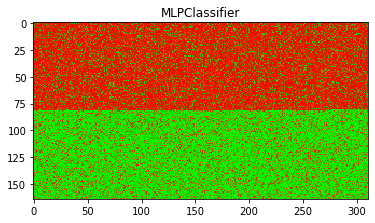

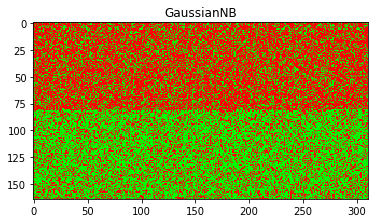

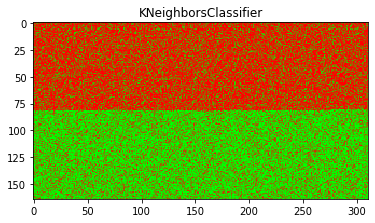

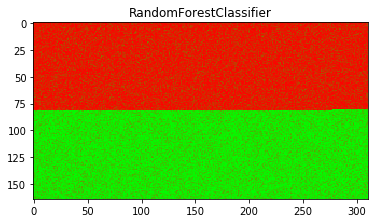

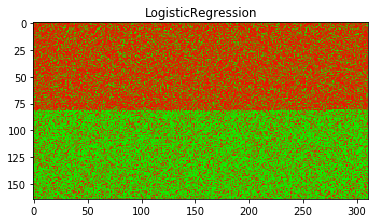

In [30]:
for model in models:
    model.fit(X_train, y_train)
    model_predictions.append(model.predict(X_train))
    blended = blend(model.predict_proba(X_train), colors=[[1,0,0], [0, 1, 0]])
    to_plot = []
    k = 0
    for i in range(164):
        row = []
        for j in range(311):
            row.append(blended[k])
            k+=1
        to_plot.append(row)
    #plt.imshow(np.reshape(blend(model.predict_proba(X_train), colors=[[1,0,0], [0, 1, 0]]), (70, 100, 3)));
    plt.title(model.__class__.__name__)
    plt.imshow(to_plot);
    plt.show()

In [32]:
matrix = np.zeros((len(models), len(models)))

In [33]:
for i, pred1 in enumerate(model_predictions):
    for j, pred2 in enumerate(model_predictions):
        matrix[i, j] = sum([1 for x, y in zip(pred1, pred2) if x == y])

#### MLPClassifier

In [34]:
nn_model = MLPClassifier()
nn_model.fit(X_train, y_train)
nn_model_y_test_predictions = nn_model.predict(X_test)

**Train the other classifiers on:**
- X_train + more labeled points given by the "reference” model

In [35]:
X_train = np.concatenate((X_train, X_test), axis=0)

In [36]:
y_train = np.concatenate((y_train.to_numpy(), nn_model_y_test_predictions), axis=0)

In [37]:
model_predictions = []

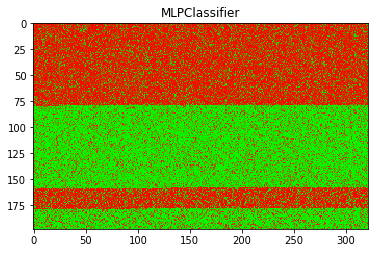

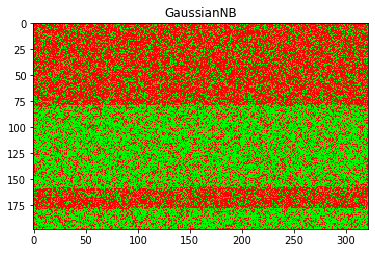

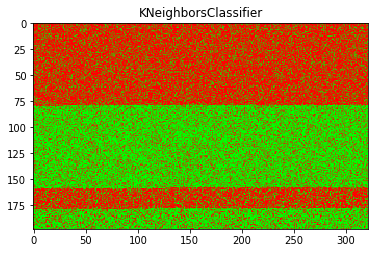

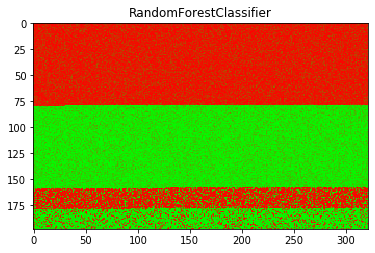

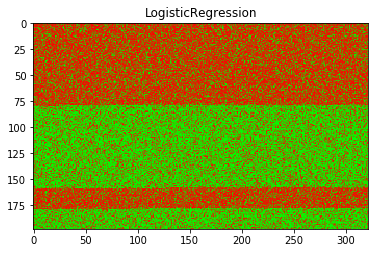

In [39]:
for model in models:
    model.fit(X_train, y_train)
    model_predictions.append(model.predict(X_train))
    blended = blend(model.predict_proba(X_train), colors=[[1,0,0], [0, 1, 0]])
    to_plot = []
    k = 0
    for i in range(198):
        row = []
        for j in range(322):
            row.append(blended[k])
            k+=1
        to_plot.append(row)
    #plt.imshow(np.reshape(blend(model.predict_proba(X_train), colors=[[1,0,0], [0, 1, 0]]), (70, 100, 3)));
    plt.title(model.__class__.__name__)
    plt.imshow(to_plot);
    plt.show()

In [40]:
matrix2 = np.zeros((len(models), len(models)))

In [41]:
for i, pred1 in enumerate(model_predictions):
    for j, pred2 in enumerate(model_predictions):
        matrix2[i, j] = sum([1 for x, y in zip(pred1, pred2) if x == y])

#### Comparison

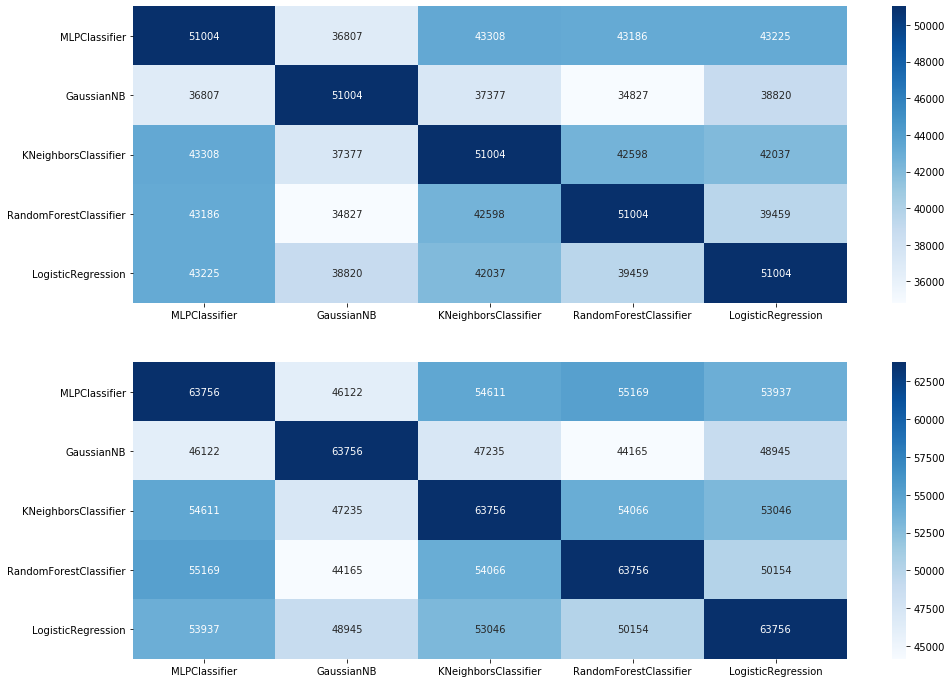

In [42]:
plt.figure(figsize=(16, 12))
plt.subplot(211)
seaborn.heatmap(matrix, xticklabels=labels,yticklabels=labels, cmap='Blues', annot=True, fmt='g')
plt.subplot(212)
seaborn.heatmap(matrix2, xticklabels=labels,yticklabels=labels, cmap='Blues', annot=True, fmt='g')

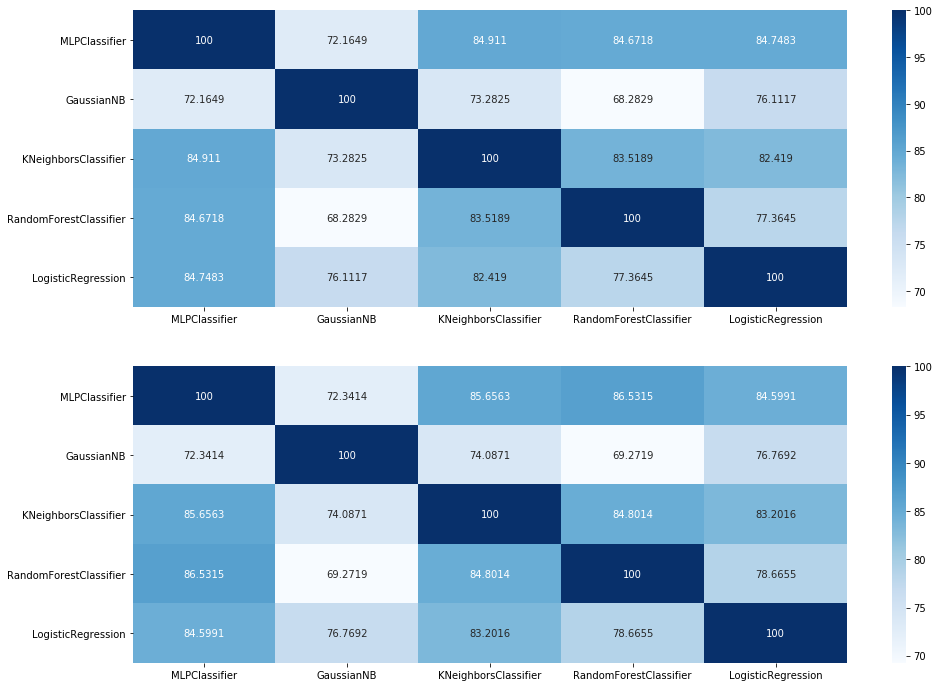

In [43]:
plt.figure(figsize=(16, 12))
plt.subplot(211)
seaborn.heatmap(matrix / matrix.max() * 100, xticklabels=labels,yticklabels=labels, cmap='Blues', annot=True, fmt='g')
plt.subplot(212)
seaborn.heatmap(matrix2 / matrix2.max() * 100, xticklabels=labels,yticklabels=labels, cmap='Blues', annot=True, fmt='g')

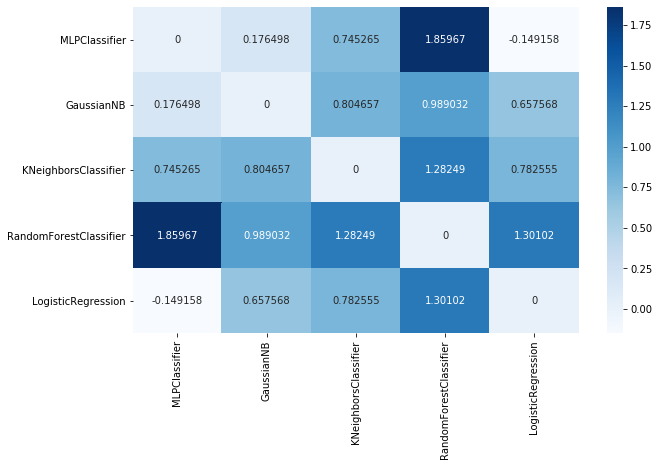

In [44]:
plt.figure(figsize=(10, 6))
seaborn.heatmap(matrix2 / matrix2.max() * 100 - matrix / matrix.max() * 100, xticklabels=labels,yticklabels=labels, cmap='Blues', annot=True, fmt='g')